## Эксперимент 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f_star(x):
    x = x.ravel()
    return x**2 + 2*x

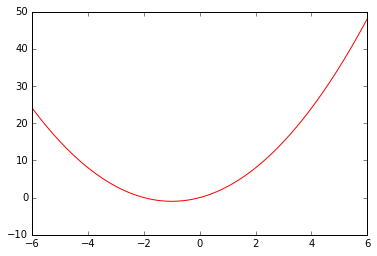

In [3]:
x_plot = np.linspace(-6, 6, 200).reshape(200, 1)
plt.plot(x_plot, f_star(x_plot), 'r')

In [4]:
sigma = 5
def generate(N, sigma = sigma):
    x = np.sort(12*np.random.rand(N) - 6)
    y = f_star(x) + sigma*np.random.randn(N)
    x = np.reshape(x, (N, 1))
    return x, y

In [5]:
N = 20
np.random.seed(0)
x_train, y_train = generate(N)

(-6, 6)

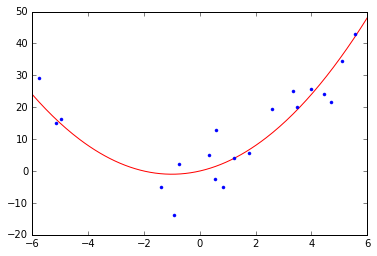

In [6]:
plt.plot(x_plot, f_star(x_plot), 'r')
plt.plot(x_train, y_train, '.b')
plt.xlim((-6, 6))

In [7]:
from sklearn import neighbors

In [8]:
nn = 5
model = neighbors.KNeighborsRegressor(n_neighbors = nn)
model.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

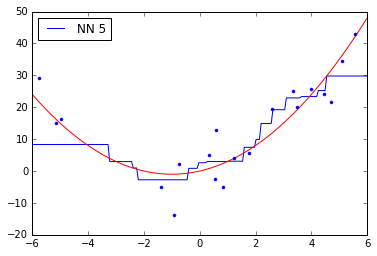

In [9]:
plt.plot(x_plot, model.predict(x_plot), label = "NN %d" % nn)
plt.plot(x_plot, f_star(x_plot), 'r')
plt.plot(x_train, y_train, '.b')
plt.xlim((-6, 6))
plt.legend(loc = 'best')

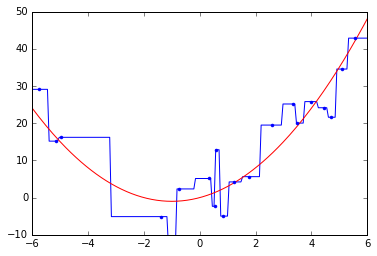

In [10]:
from IPython.html.widgets import *

def interact_model_draw(nn = 1):
    model = neighbors.KNeighborsRegressor(n_neighbors = nn)
    model.fit(x_train, y_train)
    
    plt.plot(x_plot, model.predict(x_plot), 'b')
    plt.plot(x_plot, f_star(x_plot), 'r')
    plt.plot(x_train, y_train, '.b')
    plt.xlim((-6, 6))
    plt.ylim((-10, 50))

interact(interact_model_draw, nn = (1, 20));

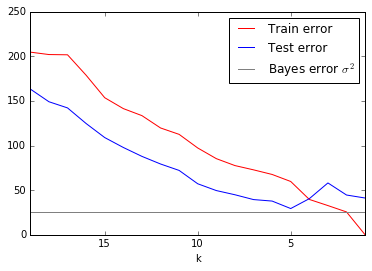

In [11]:
N_train = 20
N_test = 20
np.random.seed(0)
x_train, y_train = generate(N_train)
x_test,  y_test  = generate(N_test)

nns = range(1, N_train)

err_train = []
err_test = []

for nn in nns:
    model = neighbors.KNeighborsRegressor(n_neighbors = nn)
    model.fit(x_train, y_train)

    err_train.append(np.mean((model.predict(x_train) - y_train)**2))
    err_test.append( np.mean((model.predict(x_test)  - y_test)**2))

plt.plot(nns, err_train, 'r', label = 'Train error')
plt.plot(nns, err_test,  'b', label = 'Test error')
plt.axhline(sigma**2, color = 'gray', label = r'Bayes error $\sigma^2$')
plt.xlabel('k')
plt.xlim((N_train - 1, 1))
plt.legend(loc = 1)
pass

In [12]:
print np.min(err_test), nns[np.argmin(err_test)]

29.4109623841 5


In [13]:
def model_draw(nn = 3):
    model = neighbors.KNeighborsRegressor(n_neighbors = nn)
    model.fit(x_train, y_train)

    x, y = generate(N)
    model.fit(x, y)

    plt.plot(x_plot, f_star(x_plot), 'r')
    plt.plot(x_plot, model.predict(x_plot), 'b', alpha = .7)
    plt.xlim((-6, 6))
    plt.ylim((-10, 50))

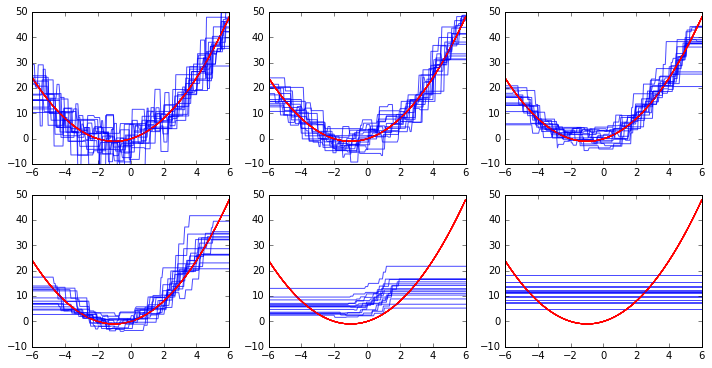

In [14]:
plt.figure(figsize = (12, 6))

plt.subplot(2, 3, 1)
for i in range(15):
    model_draw(nn = 1)

plt.subplot(2, 3, 2)
for i in range(15):
    model_draw(nn = 2)

plt.subplot(2, 3, 3)
for i in range(15):
    model_draw(nn = 3)

plt.subplot(2, 3, 4)
for i in range(15):
    model_draw(nn = 5)
    
plt.subplot(2, 3, 5)
for i in range(15):
    model_draw(nn = 15)

plt.subplot(2, 3, 6)
for i in range(15):
    model_draw(nn = 20)

In [19]:
def model_generate_predict(deg, x_vector):
    model = neighbors.KNeighborsRegressor(n_neighbors = nn)
    model.fit(x_train, y_train)
    
    x, y = generate(N)
    model.fit(x, y)

    return model.predict(x_vector)

In [20]:
x_vector = np.linspace(-6, 6, 200)
bias2 = []
variance = []
n_it = 100 # к-во итераций

for nn in nns:
    y_sum = np.zeros(x_vector.shape)
    y_sum_sqr = np.zeros(x_vector.shape)
    for it in range(n_it): 
        y = model_generate_predict(nn, x_vector.reshape(200, 1))
        y_sum = y_sum + y 
        y_sum_sqr = y_sum_sqr + y**2
    bias2.append(np.mean((y_sum/n_it - f_star(x_vector))**2))
    variance.append(np.mean(y_sum_sqr/n_it - y_sum**2/n_it**2))  
    
    

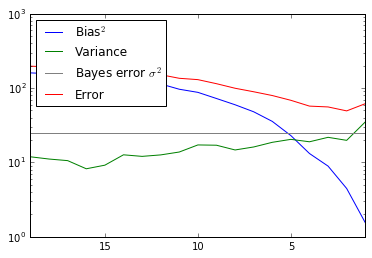

In [46]:
plt.semilogy(nns, bias2, label = r'Bias${}^2$')
plt.semilogy(nns, variance, label = r'Variance')
plt.axhline(sigma**2, color = 'gray', label = r'Bayes error $\sigma^2$')
plt.semilogy(nns, np.array(bias2) + np.array(variance) + sigma**2, label = 'Error')
plt.legend(loc = 2)
plt.xlim((N_train - 1, 1))
pass